CHARGEMENT DES LIBRAIRIES

In [ ]:
import json
import pandas as pd
import dask.dataframe as dd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

IMPORT DES FICHIER JSON

In [ ]:
# Liste pour stocker les données de tous les fichiers
all_data = []

# Parcourir tous les fichiers correspondants au format rawX.json
for file in sorted(glob.glob(r"C:\Users\33766\Downloads\Tweet Worldcup 200 fichiers\raw*.json")):
    with open(file, "r", encoding="utf-8") as f:
        for line in f:
            try:
                data = json.loads(line.strip())  # Charger chaque ligne JSON
                all_data.append(data)
            except json.JSONDecodeError as e:
                print(f"Erreur de décodage JSON dans {file}: {e}")

# Vérification du nombre de tweets chargés
print(f"Nombre total d'entrées chargées : {len(all_data)}")

Nombre total d'entrées chargées : 401999


description des colonnes : [(https://docs.x.com/x-api/fundamentals/data-dictionary)]

In [ ]:
df = pd.DataFrame(all_data)

In [ ]:
df.describe()

,current_time,in_reply_to_status_id,retweet_count,in_reply_to_user_id,favorite_count,id,quote_count,reply_count,quoted_status_id
count,4.019990e+05,7.764000e+03,401999.0,1.023000e+04,401999.0,4.019990e+05,401999.0,401999.0,4.387100e+04
mean,1.528971e+12,1.005963e+18,0.0,1.412327e+17,0.0,1.007203e+18,0.0,0.0,1.005162e+18
std,1.188820e+07,2.259245e+16,0.0,3.282852e+17,0.0,4.986271e+13,0.0,0.0,3.198442e+16
min,1.528942e+12,3.978932e+17,0.0,1.200000e+01,0.0,1.007084e+18,0.0,0.0,1.594204e+10
25%,1.528962e+12,1.007120e+18,0.0,1.336638e+08,0.0,1.007166e+18,0.0,0.0,1.006932e+18
50%,1.528973e+12,1.007185e+18,0.0,4.548087e+08,0.0,1.007214e+18,0.0,0.0,1.007151e+18
75%,1.528981e+12,1.007229e+18,0.0,2.611510e+09,0.0,1.007247e+18,0.0,0.0,1.007221e+18
max,1.528986e+12,1.007266e+18,0.0,1.007238e+18,0.0,1.007266e+18,0.0,0.0,1.007266e+18


In [ ]:
# Afficher les informations sur les colonnes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401999 entries, 0 to 401998
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   created_date               401999 non-null  object 
 1   current_time               401999 non-null  int64  
 2   in_reply_to_status_id_str  7764 non-null    object 
 3   in_reply_to_status_id      7764 non-null    float64
 4   created_at                 401999 non-null  object 
 5   in_reply_to_user_id_str    10230 non-null   object 
 6   source                     401999 non-null  object 
 7   retweeted_status           258750 non-null  object 
 8   retweet_count              401999 non-null  int64  
 9   retweeted                  401999 non-null  bool   
 10  geo                        261 non-null     object 
 11  filter_level               401999 non-null  object 
 12  in_reply_to_screen_name    10230 non-null   object 
 13  is_quote_status            40

***identification des valeurs manquantes***

In [ ]:
#1. Identification des valeurs manquantes
missing_values = df.isnull().sum()  # Nombre de valeurs manquantes par colonne
missing_percent = (missing_values / len(df)) * 100  # Pourcentage des valeurs manquantes

# 2. Création d'un tableau récapitulatif
missing_summary = pd.DataFrame({'Valeurs Manquantes': missing_values, 'Pourcentage (%)': missing_percent})

#3. Affichage des colonnes concernées uniquement
missing_summary = missing_summary[missing_summary['Valeurs Manquantes'] > 0]
print(missing_summary)


                           Valeurs Manquantes  Pourcentage (%)
in_reply_to_status_id_str              394235        98.068652
in_reply_to_status_id                  394235        98.068652
in_reply_to_user_id_str                391769        97.455218
retweeted_status                       143249        35.634168
geo                                    401738        99.935074
in_reply_to_screen_name                391769        97.455218
in_reply_to_user_id                    391769        97.455218
place                                  393116        97.790293
coordinates                            401738        99.935074
contributors                           401999       100.000000
quoted_status                          358129        89.087038
quoted_status_id                       358128        89.086789
quoted_status_permalink                358129        89.087038
possibly_sensitive                     199154        49.540919
display_text_range                     327333        81

***analyse sur les users***

In [ ]:
df_user = df['user']
df_user

0         {'utc_offset': None, 'friends_count': 826, 'pr...
1         {'utc_offset': None, 'friends_count': 686, 'pr...
2         {'utc_offset': None, 'friends_count': 44, 'pro...
3         {'utc_offset': None, 'friends_count': 3189, 'p...
4         {'utc_offset': None, 'friends_count': 407, 'pr...
                                ...                        
401994    {'utc_offset': None, 'friends_count': 63, 'pro...
401995    {'utc_offset': None, 'friends_count': 198, 'pr...
401996    {'utc_offset': None, 'friends_count': 175, 'pr...
401997    {'utc_offset': None, 'friends_count': 119, 'pr...
401998    {'utc_offset': None, 'friends_count': 320, 'pr...
Name: user, Length: 401999, dtype: object

In [ ]:
df_user = pd.DataFrame(df_user)

In [ ]:
df_user['id'] = df_user['user'].apply(lambda x: x['id'])
df_user['utc_offset'] = df_user['user'].apply(lambda x: x['utc_offset'])
df_user['friends_count'] = df_user['user'].apply(lambda x: x['friends_count'])
df_user['profile_image_url_https'] = df_user['user'].apply(lambda x: x['profile_image_url_https'])
df_user['profile_background_image_url'] = df_user['user'].apply(lambda x: x['profile_background_image_url'])
df_user['default_profile_image'] = df_user['user'].apply(lambda x: x['default_profile_image'])
df_user['favourites_count'] = df_user['user'].apply(lambda x: x['favourites_count'])
df_user['description'] = df_user['user'].apply(lambda x: x['description'])
df_user['created_at'] = df_user['user'].apply(lambda x: x['created_at'])
df_user['is_translator'] = df_user['user'].apply(lambda x: x['is_translator'])
df_user['profile_background_image_url_https'] = df_user['user'].apply(lambda x: x['profile_background_image_url_https'])
df_user['protected'] = df_user['user'].apply(lambda x: x['protected'])
df_user['screen_name'] = df_user['user'].apply(lambda x: x['screen_name'])
df_user['profile_link_color'] = df_user['user'].apply(lambda x: x['profile_link_color'])
df_user['translator_type'] = df_user['user'].apply(lambda x: x['translator_type'])
df_user['geo_enabled'] = df_user['user'].apply(lambda x: x['geo_enabled'])
df_user['profile_background_color'] = df_user['user'].apply(lambda x: x['profile_background_color'])
df_user['lang'] = df_user['user'].apply(lambda x: x['lang'])
df_user['frieprofile_sidebar_border_colornds_count'] = df_user['user'].apply(lambda x: x['profile_sidebar_border_color'])
df_user['profile_text_color'] = df_user['user'].apply(lambda x: x['profile_text_color'])
df_user['verified'] = df_user['user'].apply(lambda x: x['verified'])
df_user['profile_image_url'] = df_user['user'].apply(lambda x: x['profile_image_url'])
df_user['time_zone'] = df_user['user'].apply(lambda x: x['time_zone'])
df_user['url'] = df_user['user'].apply(lambda x: x['url'])
df_user['contributors_enabled'] = df_user['user'].apply(lambda x: x['contributors_enabled'])
df_user['profile_background_tile'] = df_user['user'].apply(lambda x: x['profile_background_tile'])
df_user['statuses_count'] = df_user['user'].apply(lambda x: x['statuses_count'])
df_user['follow_request_sent'] = df_user['user'].apply(lambda x: x['follow_request_sent'])
df_user['followers_count'] = df_user['user'].apply(lambda x: x['followers_count'])
df_user['profile_use_background_image'] = df_user['user'].apply(lambda x: x['profile_use_background_image'])
df_user['default_profile'] = df_user['user'].apply(lambda x: x['default_profile'])
df_user['following'] = df_user['user'].apply(lambda x: x['following'])
df_user['name'] = df_user['user'].apply(lambda x: x['name'])
df_user['location'] = df_user['user'].apply(lambda x: x['location'])
df_user['notifications'] = df_user['user'].apply(lambda x: x['notifications'])

df_user
df_user = df_user.drop(columns=['user'])

***Répartition des utilisateurs vérifiés***

C:\Users\33766\AppData\Local\Temp\ipykernel_81508\372211872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_user['verified'].astype(str), palette=['red', 'green'])


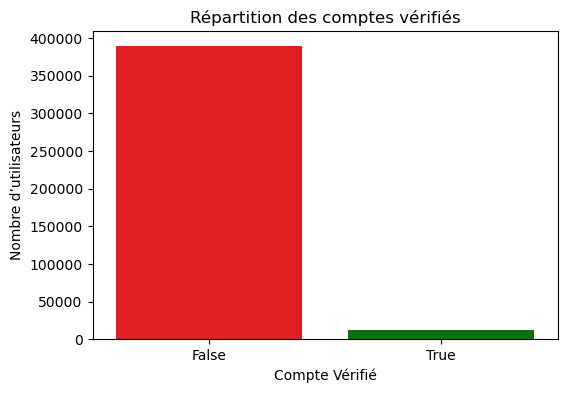

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_user['verified'].astype(str), palette=['red', 'green'])
plt.xlabel('Compte Vérifié')
plt.ylabel('Nombre d’utilisateurs')
plt.title('Répartition des comptes vérifiés')
plt.show()



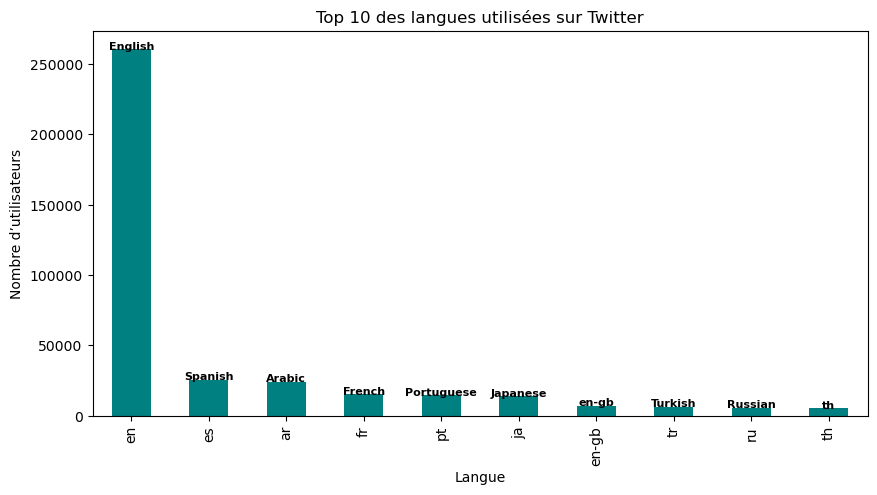

In [ ]:
import matplotlib.pyplot as plt

# Dictionnaire de correspondance des langues
lang_map = {
    "en": "English","fr": "French","pt": "Portuguese","es": "Spanish",
    "de": "German","it": "Italian","ja": "Japanese","ko": "Korean",
    "ar": "Arabic","ru": "Russian","tr": "Turkish","zh": "Chinese","hi": "Hindi","nl": "Dutch"
}

plt.figure(figsize=(10, 5))
lang_counts = df_user['lang'].value_counts().nlargest(10)

ax = lang_counts.plot(kind='bar', color='teal')

plt.xlabel('Langue')
plt.ylabel('Nombre d’utilisateurs')
plt.title('Top 10 des langues utilisées sur Twitter')

# Ajouter les noms complets des langues au-dessus des barres
for i, (lang, count) in enumerate(lang_counts.items()):
    lang_full = lang_map.get(lang, lang)  # Récupérer le nom complet ou afficher l'acronyme si inconnu
    plt.text(i, count + 50, lang_full, ha='center', fontsize=8, fontweight='bold')

plt.show()



C:\Users\33766\AppData\Local\Temp\ipykernel_81508\69549583.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_user['tweet_hour'] = pd.to_datetime(df_user['created_at']).dt.hour


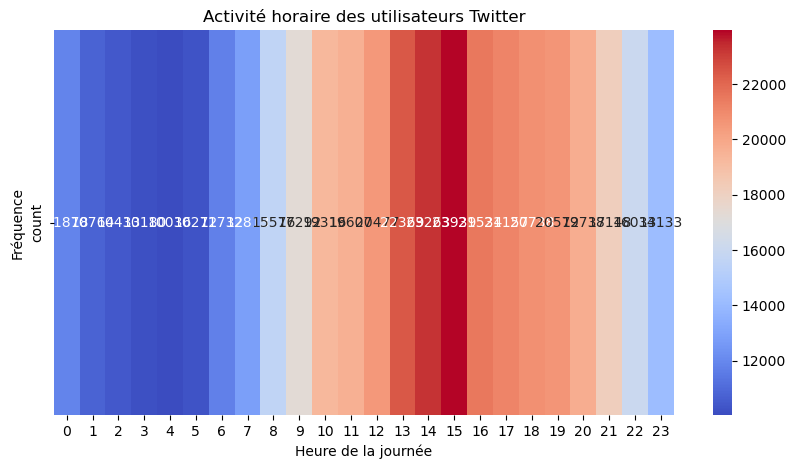

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_user['tweet_hour'] = pd.to_datetime(df_user['created_at']).dt.hour

plt.figure(figsize=(10, 5))
sns.heatmap(df_user['tweet_hour'].value_counts().sort_index().to_frame().T, cmap="coolwarm", annot=True, fmt='d')
plt.xlabel("Heure de la journée")
plt.ylabel("Fréquence")
plt.title("Activité horaire des utilisateurs Twitter")
plt.show()




In [ ]:
!pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -------- ------------------------------- 61.4/301.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 4.7 MB/s eta 0:00:00


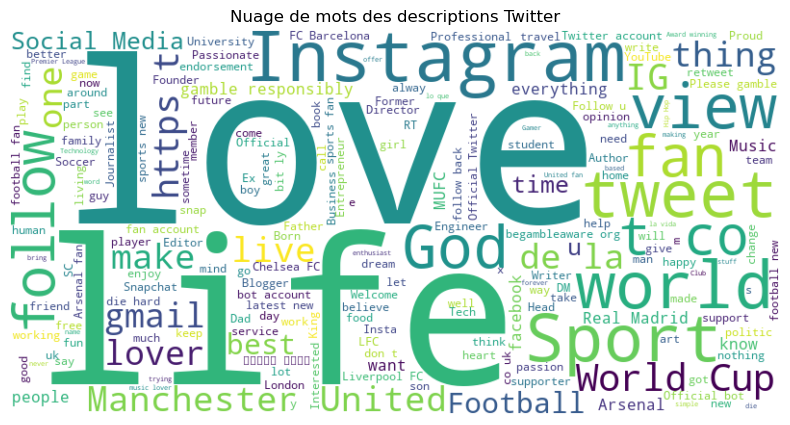

In [ ]:
from wordcloud import WordCloud

text = " ".join(df_user['description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des descriptions Twitter")
plt.show()


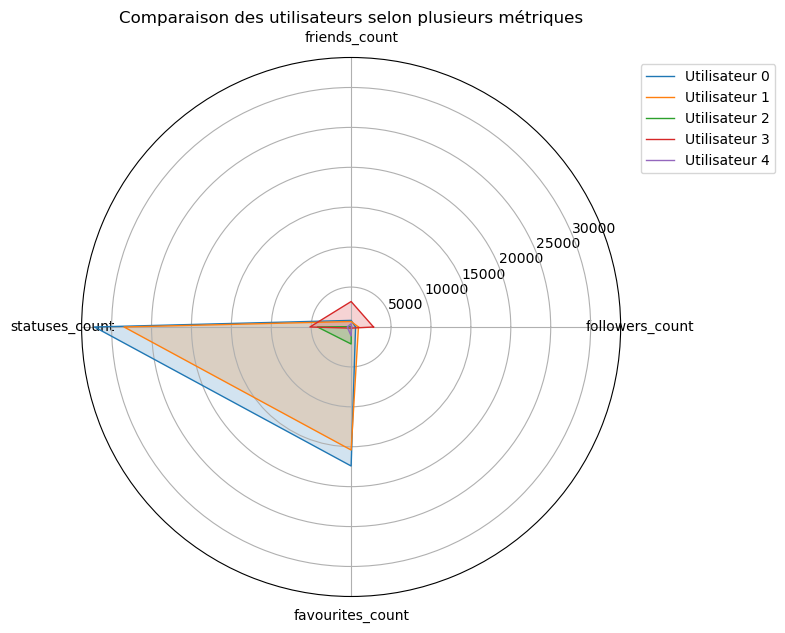

In [ ]:
from math import pi

categories = ['followers_count', 'friends_count', 'statuses_count', 'favourites_count']
df_sample = df_user[categories].head(5)  # Sélectionner quelques utilisateurs

labels = df_sample.index
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]  # Boucler le graphique

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

for i, row in df_sample.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Utilisateur {i}')
    ax.fill(angles, values, alpha=0.2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Comparaison des utilisateurs selon plusieurs métriques")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


C:\Users\33766\AppData\Local\Temp\ipykernel_81508\3950072336.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_user['created_at'] = pd.to_datetime(df_user['created_at'])  # Convertir en datetime


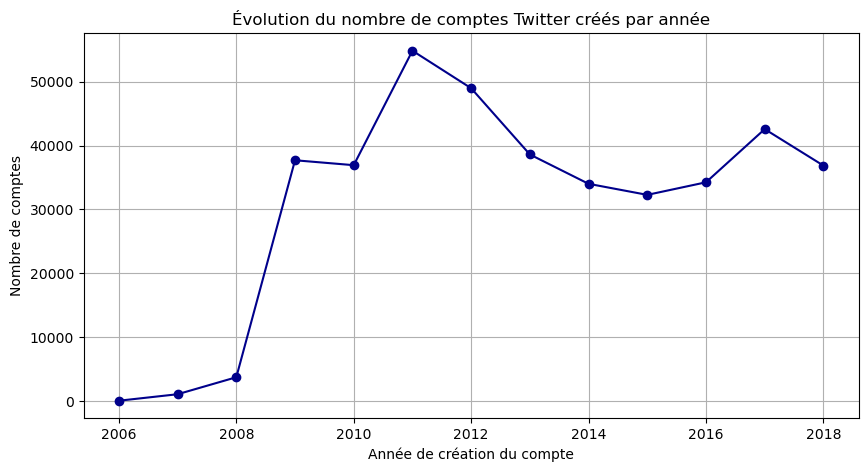

In [ ]:
df_user['created_at'] = pd.to_datetime(df_user['created_at'])  # Convertir en datetime
df_user['year_created'] = df_user['created_at'].dt.year  # Extraire l'année

plt.figure(figsize=(10, 5))
df_user['year_created'].value_counts().sort_index().plot(kind='line', marker='o', color='darkblue')
plt.xlabel("Année de création du compte")
plt.ylabel("Nombre de comptes")
plt.title("Évolution du nombre de comptes Twitter créés par année")
plt.grid()
plt.show()


In [ ]:
df.describe().columns

Index(['current_time', 'in_reply_to_status_id', 'retweet_count',
       'in_reply_to_user_id', 'favorite_count', 'id', 'quote_count',
       'reply_count', 'quoted_status_id'],
      dtype='object')

In [ ]:
df_user['id'] = df_user['user'].apply(lambda x: x['id'])
df_user['utc_offset'] = df_user['user'].apply(lambda x: x['utc_offset'])
df_user['friends_count'] = df_user['user'].apply(lambda x: x['friends_count'])
df_user['profile_image_url_https'] = df_user['user'].apply(lambda x: x['profile_image_url_https'])
df_user['profile_background_image_url'] = df_user['user'].apply(lambda x: x['profile_background_image_url'])
df_user['default_profile_image'] = df_user['user'].apply(lambda x: x['default_profile_image'])
df_user['favourites_count'] = df_user['user'].apply(lambda x: x['favourites_count'])
df_user['description'] = df_user['user'].apply(lambda x: x['description'])
df_user['created_at'] = df_user['user'].apply(lambda x: x['created_at'])
df_user['is_translator'] = df_user['user'].apply(lambda x: x['is_translator'])
df_user['profile_background_image_url_https'] = df_user['user'].apply(lambda x: x['profile_background_image_url_https'])
df_user['protected'] = df_user['user'].apply(lambda x: x['protected'])
df_user['screen_name'] = df_user['user'].apply(lambda x: x['screen_name'])
df_user['profile_link_color'] = df_user['user'].apply(lambda x: x['profile_link_color'])
df_user['translator_type'] = df_user['user'].apply(lambda x: x['translator_type'])
df_user['geo_enabled'] = df_user['user'].apply(lambda x: x['geo_enabled'])
df_user['profile_background_color'] = df_user['user'].apply(lambda x: x['profile_background_color'])
df_user['lang'] = df_user['user'].apply(lambda x: x['lang'])
df_user['frieprofile_sidebar_border_colornds_count'] = df_user['user'].apply(lambda x: x['profile_sidebar_border_color'])
df_user['profile_text_color'] = df_user['user'].apply(lambda x: x['profile_text_color'])
df_user['verified'] = df_user['user'].apply(lambda x: x['verified'])
df_user['profile_image_url'] = df_user['user'].apply(lambda x: x['profile_image_url'])
df_user['time_zone'] = df_user['user'].apply(lambda x: x['time_zone'])
df_user['url'] = df_user['user'].apply(lambda x: x['url'])
df_user['contributors_enabled'] = df_user['user'].apply(lambda x: x['contributors_enabled'])
df_user['profile_background_tile'] = df_user['user'].apply(lambda x: x['profile_background_tile'])
df_user['statuses_count'] = df_user['user'].apply(lambda x: x['statuses_count'])
df_user['follow_request_sent'] = df_user['user'].apply(lambda x: x['follow_request_sent'])
df_user['followers_count'] = df_user['user'].apply(lambda x: x['followers_count'])
df_user['profile_use_background_image'] = df_user['user'].apply(lambda x: x['profile_use_background_image'])
df_user['default_profile'] = df_user['user'].apply(lambda x: x['default_profile'])
df_user['following'] = df_user['user'].apply(lambda x: x['following'])
df_user['name'] = df_user['user'].apply(lambda x: x['name'])
df_user['location'] = df_user['user'].apply(lambda x: x['location'])
df_user['notifications'] = df_user['user'].apply(lambda x: x['notifications'])

df_user
df_user = df_user.drop(columns=['user'])

In [ ]:
# Calcul de la matrice de corrélation
correlation_matrix = df_user[["followers_count","frieprofile_sidebar_border_colornds_count", "statuses_count", "friends_count" ]].corr()

# Affichage sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Personnalisation du graphique
plt.title("Matrice de Corrélation des Variables", fontsize=14, fontweight='bold')
plt.show()

ValueError: could not convert string to float: 'C0DEED'